<a href="https://colab.research.google.com/github/JosiasSekhebesa/classification-predict-streamlit-template/blob/master/Team3_ClassificationPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Top'></a>
# CLASSIFICATION CHALLENGE


# Outline

- [Introduction](#Introduction)
- [Import necessary libraries](#Import)
- [Loading Datasets](#Load)
- [Data Preprocessing](#section-four)
- EDA
  * Analysis of the data
  
- [Classification Models](#models)  
- [Feature Egineering](#feature_engineering)
  * [TF-IDF](#tfidf)
  * [CountVectorizer](#count) 
- [Pipelines](#Pipelines)
  * [Building Classification Pipelines](#classifiers)
  * [Building Models](#build)
  * [Training Models](#training)
- [Modelling and Evaluation](#model_eval)
- [Model Comparison](#compare)
- [Ensemble Method](#ensemble)
- [Hyperparameter tunning](#tunning)
- [Final model selection](#final)
- [Predictions](#predictions)
- [Submission](#submission)  
- [Conclusion](#conclusion)
- [Appendix](#appendix)
- [References](#references)
    
    


# Introduction

Climate change describes a change in the average conditions such as temperature and rainfall in a region over a long period.
Global climate change refers to the average long term changes over the entire earth, These include warming temperatures and changes in the precipitation as well as the effects of earth's warming such as

 * Rissing sea levels
 * Shrinking mountain glaciers 
 * Ice melting at a faster rate than usual in Greenland and Artic 
 * Wildfires
 * Floods
 * Droughts
 
There are lots of factors that contribute to Earth’s climate. Scientists agree that Earth has been getting warmer in the past 50 to 100 years due to human activities, This is a statement that sparks debate among people, as we will see when exploring the tweets, There are two stands that people take on the man made climate change issue
 *  There are people that believe that humans contribute climate change, that is the `Pro` sentiment class
 *  There are people that dont believe humans contribute to climate change, that is the `Anti` sentiment class,  This may be because they either dont believe there is such as thing as climate change or they believe there is climate change but is humans don't contibute to climate change

 
Earth’s climate has constantly been changing, even long before humans came into the picture. However, scientists have observed unusual changes recently. For example, Earth’s average temperature has been increasing much more quickly than they would expect over the past 150 years.
According the scientists the main human activities that contribute to climate change over the last century is the burning of fossil fuels like coal and oil as well as carbon pollution , which has increased the concentration of atmospheric carbon dioxide(CO2).

<!-- The diagram below shows average global temperature and carbon emission between 1880 and 2019 
![2020CO2Peak_Temps_en_title_lg.jpg](https://ccimgs-2020.s3.amazonaws.com/2020CO2Peak/2020CO2Peak_Temps_en_title_lg.jpg)
 -->
 
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Statistics show that 90% of the world's data has been generated over the past 2 years, this explosion of information that is known as `big data` most of this data is text data generated through socia media posts and comments. 

Twitter is one of the most popular social media sites and has become a huge data source of text data, generating over 12 Terabytes of data per day, The explosion in text data came with a growing demand for orginizations to analyse and gather insights from text data, which is known as text analytics.

`Text analytics` is the automated process of translating large volumes of unstructured text into quantitative data to uncover insights, trends, and patterns. combined with data visualization tools, this technique enables companies to understand the story behind the numbers and make better decisions. In this notebook we will look into a concept called sentiment analysis using tweets.
 `Sentiment analysis` (also known as opinion mining or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information
 
![twitter-bird-animated-logo.gif?w=300&zoom=2](https://dropnerblog.files.wordpress.com/2019/12/twitter-bird-animated-logo.gif?w=300&zoom=2)

Companies are constructed around lessening ones environment impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

**Problen Statement**

Create a Natural Language Processing model to classify whether or not a person believes in climate change, based on their novel tweet data. 

<a id="comet"></a>
# Starting a Comet experiment
<img src="https://www.comet.ml/images/logo_comet_light.png" width="350" alt="Drawing" style="width: 350px;"/>
We will be using Comet as a form of version control throughout the development of our model

In [1]:
# install comet
# !pip install comet_ml

In [2]:
# importing Experiment from comet
# from comet_ml import Experiment

In [3]:
# # Linking our current workspace to comet by creating an experiment with our api key:
# experiment = Experiment(
#     api_key="YBjEZqF3vM9CQLf2Lx7GeSw0C",
#     project_name="general",
#     workspace="mpho-mokhokane",
# )

<a id='Import'></a>
# Import necessary libraries

In [4]:
# downloads
!pip install parfit
!pip install scikit-plot
!pip install contractions


# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle


# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# metrics

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# imports for data visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline


  Created wheel for parfit: filename=parfit-0.220-cp36-none-any.whl size=8661 sha256=c9525f2f35da58d48bb3ad2e325a0be482d890abbed809775d38c78b4c448e58
  Stored in directory: /root/.cache/pip/wheels/d9/8a/c9/ed86e85ad0cb41ce2fdcb6bc215902dc475bd3fb1fef7c742d
Successfully built parfit
     |████████████████████████████████| 317kB 5.9MB/s 
     |████████████████████████████████| 245kB 30.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81688 sha256=106c5d3a4eb53fe6fa5549e16f5b12895b6ab6f21640ded6a17fe19c2cf1ca36
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


<a id='Load'></a>
# Load and view the data

In [5]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Create a copy for EDA
train_eda = train.copy()

# Create copies for modeling
train_data = train.copy()
test_data = test.copy()

In [6]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [7]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# Data Preprocessing

Identifying Missing Values and Check for Data Types

In [8]:
#Cheching if there are missing values in the Train dataset
train.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  15819 non-null  bool 
 1   message    15819 non-null  bool 
 2   tweetid    15819 non-null  bool 
dtypes: bool(3)
memory usage: 46.5 KB


In [9]:
#Cheching if there are missing values in the Test dataset
test.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   message  10546 non-null  bool 
 1   tweetid  10546 non-null  bool 
dtypes: bool(2)
memory usage: 20.7 KB


In [10]:
# Part of Speech for modeling
def POS(word):
    """
    This function gets the part of speech
    """
    pos_counts = Counter()
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
    part_of_speech = pos_counts.most_common(1)[0][0]
    return part_of_speech

**Extract Useful Data**

In [11]:
# Extract mentions

def extractor(df):
    # your code here
    """" 
        Returns a DataFrame with three additional columns: 
        "hashtags", "mentions" and "url"
         Args:
             DataFrame: DateFrame with Data,Index and Colums
        Return:
             DataFrame: A DataFrame with additional columns with data
        Egs:
             df['new colum'] = col_name
    """
    # Extract hashtags
    tweets = df['message']
    df['hashtags'] = df.message. str.lower().str.findall(r'#.*?(?=\s|$)')
    htags = df['hashtags']
    df['hashtags'] = htags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract mentions
    df['mentions'] = df.message. str.lower().str.findall(r'@\w*')
    mtags = df['mentions']
    df['mentions'] = mtags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract url
    df['url'] = df.message. str.lower().str.findall(r'http\S+|www.\S+')
    urltags = df['url']
    df['url'] = urltags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    return df


In [12]:
extractor(train)

,sentiment,message,tweetid,hashtags,mentions,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,RT @RawStory: Researchers say we have three ye...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],[@soynoviodetodas],NaN
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,NaN,[@ezlusztig],[https://…]
15815,2,RT @washingtonpost: How climate change could b...,17856,NaN,[@washingtonpost],[https://t.co/rpfgvb2plq]
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,NaN,NaN,[https://t.co/0mp2]
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,[#agenda2030.],[@sara8smiles],NaN


**Remove Unnecessary Information on Message**

In [13]:
# Remove URLs
train['message'] = train['message'].str.replace('http\S+|www.\S+', '', case=False)

# Remove mentions
train['message'] = train['message'].str.replace('@\w*', '', case=False)

# Removal hashtags
train['message'] = train['message'].str.replace('#.*?(?=\s|$)', '', case=False)

# Remove 'RT'
train['message'] = train['message'].str.replace('RT', '', case=False)

# Remove stopwords
train.head()

,sentiment,message,tweetid,hashtags,mentions,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN


**Expand Contractions**

In [14]:
train['message'] = train['message'].apply(lambda x: contractions.fix(x))

**Continue cleaning 🧼🧽....**

In [15]:
# Clean tweets
def clean_tweets(df):
    '''
    This function cleans the tweets by tokenizing, removing punctuation, 
    removing digits and removing 1 character tokens
    
    '''

    # tokenizing the tweets
    clean_tweets = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize

    # remove punctuation
    clean_tweets = clean_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # lastly we remove all one character tokens
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df['cleaned_tweets'] = clean_tweets
    
    return df['cleaned_tweets']

In [16]:
clean_tweets(train)

0        [PolySciMajor, EPA, chief, does, not, think, c...
1        [it, is, not, like, we, lack, evidence, of, an...
2        [Researchers, say, we, have, three, years, to,...
3        [WIRED, 2016, was, pivotal, year, in, the, war...
4        [it, is, 2016, and, racist, sexist, climate, c...
                               ...                        
15814    [They, took, down, the, material, on, global, ...
15815    [How, climate, change, could, be, breaking, up...
15816    [notiven, nytimesworld, What, does, Trump, act...
15817    [Hey, liberals, the, climate, change, crap, is...
15818         [climate, change, equation, in, screenshots]
Name: cleaned_tweets, Length: 15819, dtype: object

**Remove Stopwords**

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
train['cleaned_tweets'] = train['cleaned_tweets'].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
train['no_stopwords'] = train['cleaned_tweets'].apply(lambda x: [item for item in x if item not in stop])

train.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords
0,1,PolySciMajor EPA chief does not think carbon d...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,NaN,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[like, lack, evidence, anthropogenic, global, ..."
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,..."
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha..."
4,1,": it is 2016, and a racist, sexist, climate c...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it, is, 2016, and, racist, sexist, climate, c...","[2016, racist, sexist, climate, change, denyin..."


Most Frequent Words

In [19]:
from collections import Counter
cnt = Counter()
for message in train['no_stopwords'].values:
    for word in message:
        cnt[word] += 1
        
cnt.most_common()


[('climate', 12643),
 ('change', 12577),
 ('global', 3782),
 ('warming', 3519),
 ('trump', 1960),
 ('believe', 1158),
 ('us', 809),
 ('...', 809),
 ('going', 733),
 ('real', 718),
 ('world', 655),
 ('people', 612),
 ('new', 542),
 ('via', 539),
 ('epa', 536),
 ('fight', 474),
 ('like', 470),
 ('says', 430),
 ('science', 424),
 ('die', 420),
 ('scientists', 414),
 ('hoax', 394),
 ('donald', 389),
 ('say', 370),
 ('think', 364),
 ('thinking', 354),
 ('would', 348),
 ('president', 339),
 ("trump's", 322),
 ('husband', 317),
 ('could', 316),
 ('need', 300),
 ('one', 286),
 ('know', 285),
 ('china', 283),
 ('action', 281),
 ('make', 269),
 ('right', 267),
 ('years', 253),
 ('thinks', 250),
 ('stop', 249),
 ('want', 246),
 ('pruitt', 243),
 ('energy', 241),
 ('news', 240),
 ('still', 229),
 ('weather', 227),
 ('must', 223),
 ('due', 220),
 ('time', 218),
 ('eah', 218),
 ('chinese', 216),
 ('planet', 214),
 ('president-elect', 213),
 ('get', 212),
 ('scott', 212),
 ('denier', 208),
 ('good', 

**Map the sentiment class by name**

In [20]:
train['sent_labels']  = train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train_eda['sent_labels']  = train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})

Separate Datframes of Tweets for each Sentiment

In [21]:
#sentiment value 0
neutral_df = train[train['sentiment'] == 0]
neutral_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924,NaN,NaN,NaN,"[calum, tweets, abt, reunitingish, the, cast, ...","[calum, tweets, abt, reunitingish, cast, sees,...",Neutral
22,0,"we also met this guy, he let us in on some tru...",67545,NaN,NaN,[https://t.co/q7yomcmzaj],"[we, also, met, this, guy, he, let, us, in, on...","[also, met, guy, let, us, truth, climate, chan...",Neutral
30,0,are these the same scientists that denounce c...,365051,NaN,[@jnp_ftw],NaN,"[are, these, the, same, scientists, that, deno...","[scientists, denounce, climate, change, choice]",Neutral
39,0,We’ ve dealt with simple issues like climate c...,403368,[#qanda],NaN,NaN,"[we, ve, dealt, with, simple, issues, like, cl...","[dealt, simple, issues, like, climate, change,...",Neutral
43,0,: Win probability is bullshit man. I saw the ...,326916,NaN,[@andrewsharp],NaN,"[win, probability, is, bullshit, man, saw, the...","[win, probability, bullshit, man, saw, nba, fi...",Neutral


In [22]:
#sentiment value 1
pro_df = train[train['sentiment'] == 1]
pro_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels
0,1,PolySciMajor EPA chief does not think carbon d...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, does, not, think, c...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,it is not like we lack evidence of anthropogen...,126103,NaN,NaN,NaN,"[it, is, not, like, we, lack, evidence, of, an...","[like, lack, evidence, anthropogenic, global, ...",Pro
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro
4,1,": it is 2016, and a racist, sexist, climate c...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it, is, 2016, and, racist, sexist, climate, c...","[2016, racist, sexist, climate, change, denyin...",Pro
5,1,Woh a read whether you do or do not believe in...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, do, not, bel...","[woh, read, whether, believe, climate, change]",Pro


In [23]:
#sentiment value -1
anti_df = train[train['sentiment'] == -1]
anti_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels
28,-1,Sally Kohn’s latest evidence of climate change...,355491,NaN,[@twitchyteam],[https://t.co/mhkzogl9vt],"[sally, kohn, latest, evidence, of, climate, c...","[sally, kohn, latest, evidence, climate, chang...",Anti
46,-1,Carbon Tax is a Globalist idea to enslave the...,61141,NaN,[@realdonaldtrump],NaN,"[carbon, tax, is, globalist, idea, to, enslave...","[carbon, tax, globalist, idea, enslave, world'...",Anti
48,-1,: We had winds close to 100 MPH in the area t...,719523,NaN,[@stevesgoddard],NaN,"[we, had, winds, close, to, 100, mph, in, the,...","[winds, close, 100, mph, area, afternoon, woul...",Anti
56,-1,lmao 😂 snowflakes ❄️ complaining about snowfl...,911385,NaN,[@misslizzynj],NaN,"[lmao, snowflakes, complaining, about, snowfla...","[lmao, snowflakes, complaining, snowflakes, wi...",Anti
57,-1,: This is ONE of Arnold Schwarzenegger's vehi...,768263,NaN,[@dawn2334dawn],[http…],"[this, is, one, of, arnold, schwarzenegger's, ...","[one, arnold, schwarzenegger's, vehicles, whin...",Anti


In [24]:
#sentiment value -1
news_df = train[train['sentiment'] == 2]
news_df.head()

,sentiment,message,tweetid,hashtags,mentions,url,cleaned_tweets,no_stopwords,sent_labels
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News
12,2,: We only have a 5 percent chance of avoiding...,454673,NaN,[@tveitdal],"[https://t.co/xubtqnxhkk, https://t.co/of…]","[we, only, have, percent, chance, of, avoiding...","[percent, chance, avoiding, dangerous, global,...",News
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092,NaN,NaN,[https://t.co/ofc2wsu4ex],"[fossil, fuel, giant, exxonmobil, misled, the,...","[fossil, fuel, giant, exxonmobil, misled, publ...",News
26,2,Bangladesh confronting climate change head on,365291,NaN,NaN,"[https://t.co/mtqenbqdut, https://t.co/itgkuxg...","[bangladesh, confronting, climate, change, hea...","[bangladesh, confronting, climate, change, head]",News
32,2,: Atmospheric rivers fueled by climate change...,143471,NaN,[@latimes],"[https://t.co/p0lzbhlu5k, https://t…]","[atmospheric, rivers, fueled, by, climate, cha...","[atmospheric, rivers, fueled, climate, change,...",News


# Exploratory Data Analysis 

In this section we want to apply a variety of techniques to maximize specific insights into a dataset, reveal underlying structure, extract significant variables, detect outliers and anomalies, test assumptions, develop models, and determine best parameters for estimations. In essence, we want to dig deeper into our dataset to more insights about its behaviour!

### Explore the target variable

We want to understand the behaviour of our target variable for our respective categories...let's dig in ⛏!

Percentage contribution:
 Pro        53.922498
News       23.010304
Neutral    14.874518
Anti        8.192680
Name: sent_labels, dtype: float64


None

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


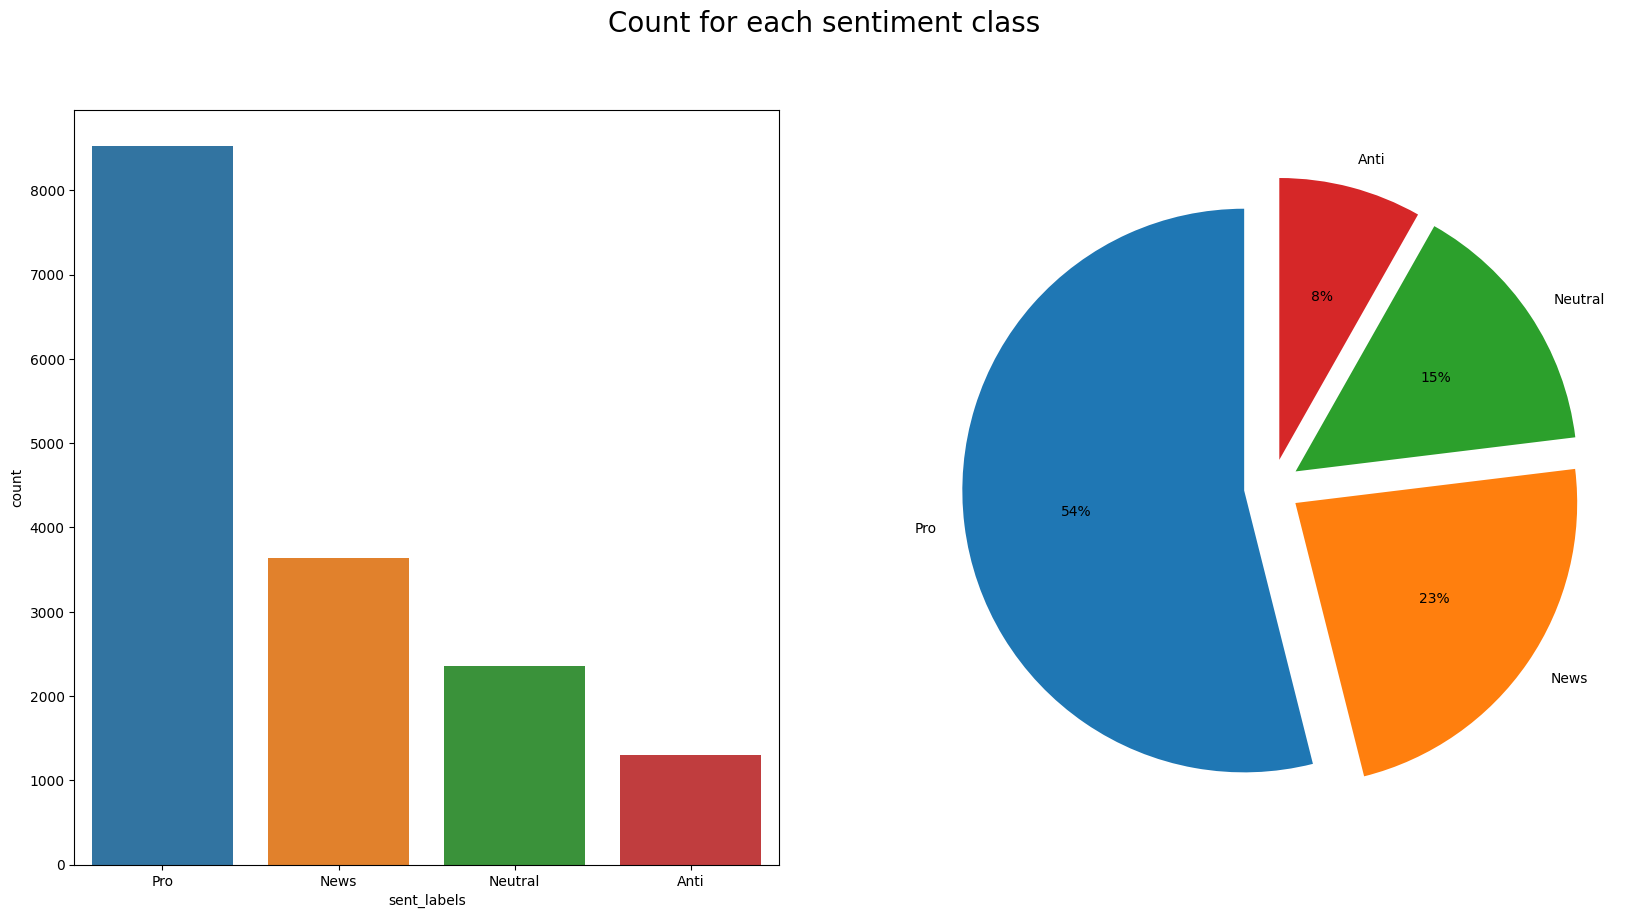

In [25]:
# Display target distribution

display(print("Percentage contribution:\n",train.sent_labels.value_counts(normalize=True)*100))

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(train['sent_labels'], ax=axes[0])

code_labels=['Pro', 'News', 'Neutral', 'Anti']
axes[1].pie(train['sent_labels'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Count for each sentiment class', fontsize=20)
plt.show()

In [26]:
# Get the length of each message for each class
train_eda['text_length'] = train_eda['message'].apply(lambda x: len(x))
train_eda.head()

,sentiment,message,tweetid,sent_labels,text_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,Pro,140
1,1,It's not like we lack evidence of anthropogeni...,126103,Pro,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,News,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,Pro,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,Pro,122


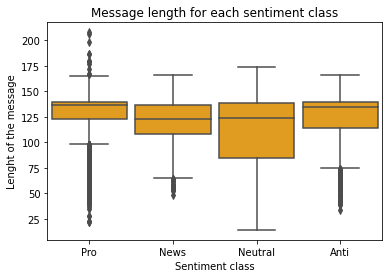

<Figure size 2160x720 with 0 Axes>

In [30]:
sns.boxplot(x=train_eda['sent_labels'], y=train_eda['text_length'], 
            data=train_eda, width = 0.9, color = 'orange')
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.figure(figsize=(30,10)) # --->revisit
plt.show()

##### Quick observations:
* There are no missing values for our target data, including the feature message.
* There is a strong imbalance for sentiment classes
* Sentiment class '1' (Pro) dominates the chart with over 50% contribution, while class '-1' (Anti) lags behind with 8%.


## Investigate the feature variable

At this stage we want to understand the message and its contents much better, to draw fruitful insghts about our target variable. 


### Sentiment Analysis

Sentiment analysis is a technique that detects the underlying sentiment in a piece of text. It is the process of classifying text as either positive, negative, or neutral. The values range from 1 to -1; with positivity decreasing from 1 to -1, having a neutral sentiment at 0.

![Alt_text](https://miro.medium.com/max/687/1*FRd4BsrZ2VxKLbvVYJQC6w.png)


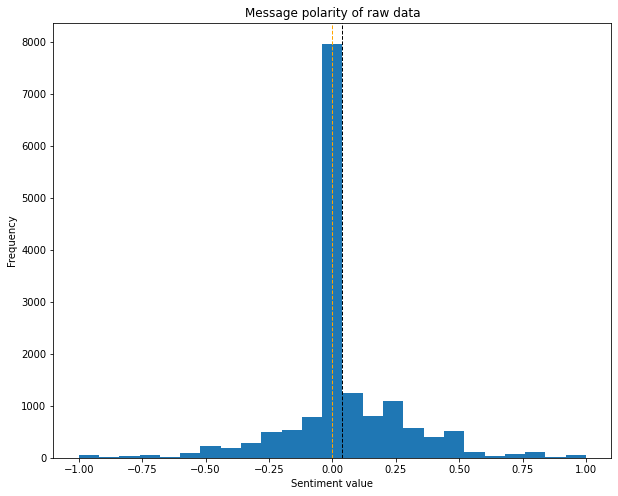

In [31]:
#Compare the sentiment analysis from raw data

from textblob import TextBlob
train_eda['polarity']=train_eda['message'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train_eda['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of raw data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train_eda['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train_eda['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

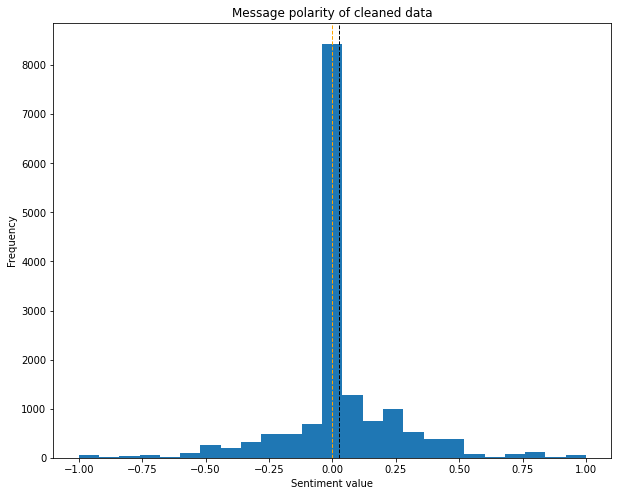

In [32]:
#Compare the sentiment analysis from cleaned data

# Convert the cleaned message from list to string
train_eda['clean_msg'] = train['no_stopwords'].str.join(' ')

train_eda['polarity'] = train_eda['clean_msg'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train_eda['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of cleaned data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train_eda['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train_eda['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

###### Observation 
- Positively skewed sentiments, mean is greater than median.
- Majority of the tweets are around neutral sentiment
- Cleaned data has a greater mean than raw data; however, the central tendency show a similar trend for both.



### Infiltrate text analysis
From here, we want to dig deeper into our text and investigate each word individually and its frequency of use. 


# NEED TO FIX
1. Remove numbers totally
2. Remove inverted commas
3. 

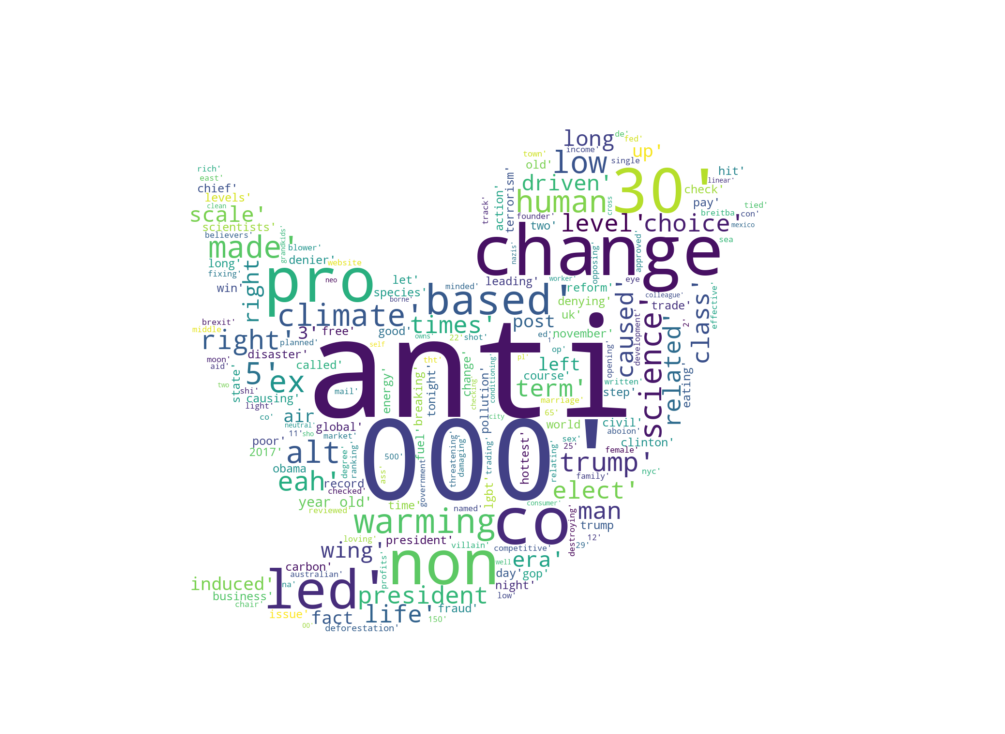

In [36]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open('OKAY'))
words = train['no_stopwords']
allwords = []
for wordlist in words:
    allwords += wordlist
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=1000, height=1000, mask = mask, background_color=
                      'white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

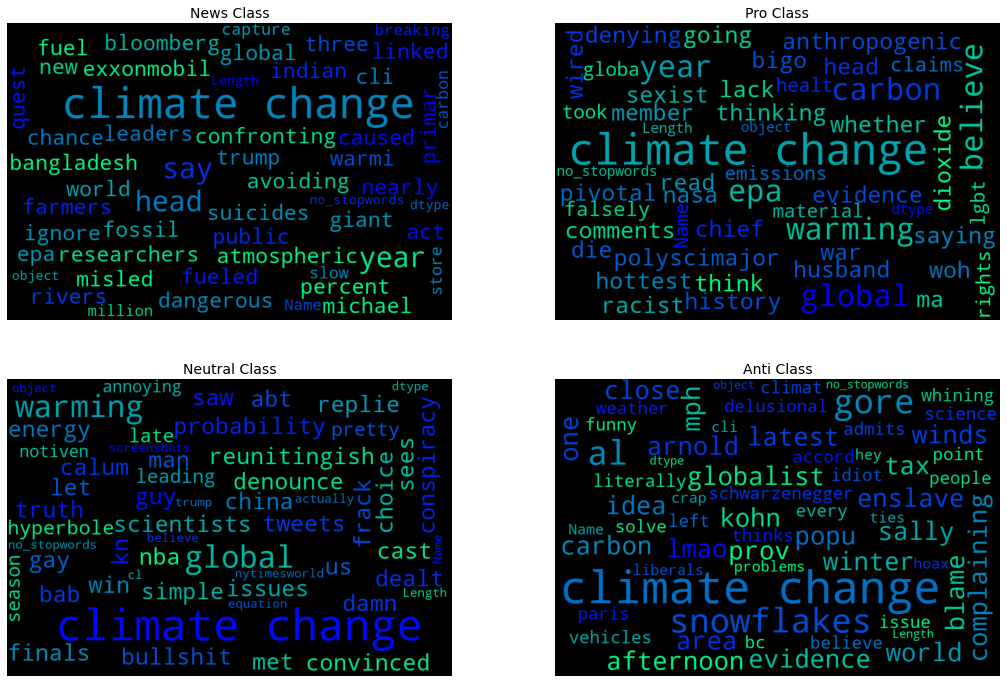

In [37]:
# Convert list to strings for each sentiment class
news = news_df["no_stopwords"].str.join(' ')
neutral = neutral_df["no_stopwords"].str.join(' ')
pro = pro_df["no_stopwords"].str.join(' ')
anti = anti_df["no_stopwords"].str.join(' ')

#Visualize each sentiment class

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

news_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter').generate(str(news))
axis[0, 0].imshow(news_wordcloud)
axis[0, 0].set_title('News Class',fontsize=14)
axis[0, 0].axis("off") 

neutral_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(neutral))
axis[1, 0].imshow(neutral_wordcloud)
axis[1, 0].set_title('Neutral Class',fontsize=14)
axis[1, 0].axis("off") 

pro_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(pro))
axis[0, 1].imshow(pro_wordcloud)
axis[0, 1].set_title('Pro Class',fontsize=14)
axis[0, 1].axis("off") 

anti_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(anti))
axis[1, 1].imshow(anti_wordcloud)
axis[1, 1].set_title('Anti Class',fontsize=14)
axis[1, 1].axis("off") 

plt.show()

# Subplots for each sentiment containing: Frequent word, Tags, Mentions and Entities (and something on URLs)

# WHAT'S LEFT:
1. plot visual as above
2. Add more insights
3. Draw conclusions
4. 

<a id='models'></a>
# Classification Models
We're going to look at the following models:

*  Decision Tree Classifier
*  RandomForest Classifier
*  LinearSVC(Support Vector Classifier)
*  Support Vector Classifier
*  Logistic Regression
*  Stochastic Gradient Descent (SGD)


<a id='tree'></a>
## Tree-based Models for Classification

<a id='DC'></a>
### Decision Tree Classifier

![1*bcLAJfWN2GpVQNTVOCrrvw.png](https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png)
Decision Trees (DTs) are  non-parametric supervised learning methods used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down data by partitioning it into subsets after each decision while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Visual representation of a `Decision Tree`
![1*WerHJ14JQAd3j8ASaVjAhw.jpeg](https://miro.medium.com/max/963/1*WerHJ14JQAd3j8ASaVjAhw.jpeg)


Decision trees are prone to overfitting. Overfitting happens when the learning algorithm continues to develop hypotheses that reduce training set error at the cost of an increased test set error; One method to tackle overfitting in decision trees is by **prunning**.
There are several approaches used to avoid overfitting in building decision trees namely, 		
- Pre-pruning that stops growing the tree earlier, before it perfectly classifies the training set.
- Post-pruning that allows the tree to perfectly classify the training set, and then post prune the tree. 
Practically, the second approach of post-pruning overfit trees is more successful because it is not easy to precisely estimate when to stop growing the tree.

Decision Trees are building blocks for the next machine learning method we will look into, which is the **Random Forest Classifier**

<a id='random'></a>
### Random Forest Classifier
`Random forest` is a supervised learning algorithm that can be used both for classification and regression. A forest is comprised of a number of individual trees. It is said that the more trees it has, the more robust a forest is, unlike decision trees `Random Forest`  prevents overfitting by creating trees on random subsets  

The Random forest algorithm works in four steps

 1. Selects a number of random samples from a given dataset
 2. Construct a decision tree for each sample and get a prediction result from each decision tree
 3. Perform a vote for each predicted result.
 4. Select the prediction result with the most votes as the final prediction.

a visual representation of a Random Forest classifier is seen in the diagram below
![voting_dnjweq.jpg](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)





## Support Vector Classification(LinearSVC)
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes as seen in the diagram below

![1*dh0lzq0QNCOyRlX1Ot4Vow.jpeg](https://miro.medium.com/max/963/1*dh0lzq0QNCOyRlX1Ot4Vow.jpeg)

To better explain the concept of `SVM` we will look at a case of two classes.

**To find the best line seperating the classes**

The `SVM` algorithm finds the points closest to the line from both the classes.These points are called support vectors, then it compute the distance between the line and the support vectors, This distance is called the margin. Our goal is to maximize the margin.

In a case for more than two classes the goal is to find the the best hyperplane that seperates the classes.
The hyperplane for which the margin is maximum is the optimal hyperplane.

Below is a visual representation of how `SVMs` work

![1*06GSco3ItM3gwW2scY6Tmg.png](https://miro.medium.com/max/963/1*06GSco3ItM3gwW2scY6Tmg.png)

We wil be looking at two Support Vector Classifer models namely SVC and LinearSVC, the main differences between these two are as follows
- By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVCuses the One-vs-One multiclass reduction.

## Logistic Regression

**Logistic regression** is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance.

The figure below is the sigmoid function logistic regression models use to make predictions:
![1*QY3CSyA4BzAU6sEPFwp9ZQ.png](http://miro.medium.com/max/725/1*QY3CSyA4BzAU6sEPFwp9ZQ.png)



Advantages
* Convenient probability scores for observations (probability of each outcome is transformed into a classification);
* Not a major issue if there is collinearity among features (much worse with linear regression).

Disadvantages
* Can overfit when data is unbalanced (i.e.: we have far more observations in one class than the other).
* Doesn't handle large number of categorical variables well.

## Stochastic Gradient Descent

**Stochastic Gradient Descent (SGD)** is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration.

![GD-v-SGD.png](http://pythonmachinelearning.pro/wp-content/uploads/2017/09/GD-v-SGD.png)

The advantages of Stochastic Gradient Descent are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).


The disadvantages of Stochastic Gradient Descent include:
* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
* SGD is sensitive to feature scaling.

<a id='feature_engineering'></a>
# Feature Engineering
We will be looking at two methods of generating features namely, `tfidfVectorizer` and `CountVectorizer`


<a id='tfidf'></a>
##  TFIDF

`TF-IDF` stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is for a document, while also taking into account the relation to other documents from the same corpus.
This is performed by looking at how many times a word appears into a document while also paying attention to how many times the same word appears in other documents in the corpus.
`vocabulary_` Is a dictionary that converts each word in the text to feature index in the matrix, each unique token gets a feature index.
 

<a id='count'></a>
## CountVectorizer

The `CountVectorizer` provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary by creating a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix.


In [39]:
# Data preprocessing for model building

train = train_data.copy()
test = test_data.copy()
normalizer = WordNetLemmatizer()
nltk.download('wordnet')

def replace_sentiments(df):
    """
    replace keywords in the tweets  with associated sentiments
    
    'global' ----> 'negative'
    'climate' ----> 'positive'
    'MAGA'----> 'negative'
  
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative')) 

    return df['message']

train['message'] = replace_sentiments(train)
test['message'] = replace_sentiments(test)

# cleaning tweets
train['clean_tweets'] = clean_tweets(train)
test['clean_tweets'] = clean_tweets(test)


# lemmatize
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test['clean_tweets'] = test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Creating our X and y Metrics

In [41]:
X = train['clean_tweets']
y = train['sentiment']
X_test = test['clean_tweets']

# Splitting data

Separating data into training and validation sets is an important part of evaluating our models. 
In our case we will randomly split the train data into 90% train and 10% validation. 
After our model is trained with the train data we then use it to make predictions for the target using the validation set,Because the data in the validation set already contains known values for the target variable this will make it easy  for us to asses our model's accuracy.

In [42]:
# Splitting the data into 90% train and 10% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

In [43]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

<a id='Pipelines'></a>
# Pipelines
![cover.png](https://www.houseofbots.com/images/news/11939/cover.png)
`Pipeline`  by definition is a tool that sequentially applies a list of transforms and a final estimator. Intermediate steps of pipeline implement fit and transform methods and the final estimator only needs to implement fit. In our case pipelines will help us tranform the train, validation and test data as well as train our models.

Since our models can only process numerical data our first step is to build a pipeline that converts text data into numeric data, In this notebook we will be focusing on two methods of feature engineering, which we will use to convert text data to numeric data, namely `TfidfVectorizer` and the `CountVectorizer`, then we will train our models within these pipelines

We will be building pipelines with features generated using both `tfidfVectorizer` and the `CountVectorizer`

<a id='build'></a>
## Building classification  pipelines


In order to decide which feature extraction method we will use between the `TF-IDF` and the `CountVectorizer` for the remainder of the notebook, we will build pipelines using both methods and check which approach ahs the highest accuracy on average

In [44]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])
tree_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])
rfc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
Lsvc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('svc', LinearSVC()),])



# Logistic Regression pipeline
logreg_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
logreg_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('logistic', LogisticRegression()),])



# SGD Classifier pipeline
SGD_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SGD', SGDClassifier()),])




# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SVC', SVC()),])


<a id='train'></a>
## Training models
Each model is trained using it's custom pipeline which will take raw text data turn it into numeric data and initial the classifier with default parameters

In [45]:
# training the decision tree pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForest pipleline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the logistic regression pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

# training the SGD Classifier
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the support vector classifier
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('CountVec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=180000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('SVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
             

In [46]:
# calculating average scores for the TFIDF
tree_acc =  accuracy_score(y_val,tree_tfidf.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_tfidf.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_tfidf.predict(X_val))
log_acc = accuracy_score(y_val, logreg_tfidf.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_tfidf.predict(X_val))
svc_acc = accuracy_score(y_val, svc_tfidf.predict(X_val))

tfidf_avg_accuracy = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc]),4)

In [47]:
tree_acc =  accuracy_score(y_val,tree_count.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_count.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_count.predict(X_val))
log_acc = accuracy_score(y_val, logreg_count.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_count.predict(X_val))
svc_acc = accuracy_score(y_val, svc_count.predict(X_val))

CountVec = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc]),4)

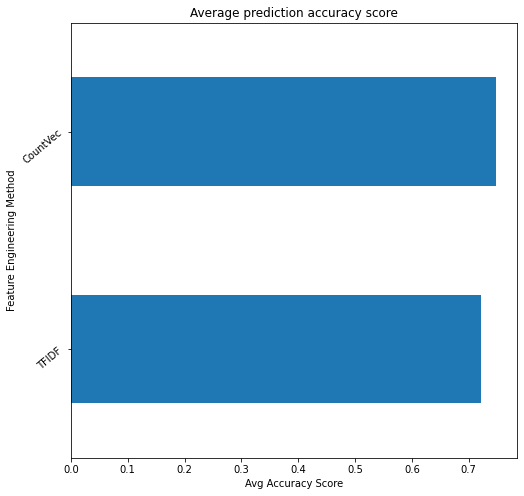

In [50]:
accuracy_dict = {'TFIDF':[tfidf_avg_accuracy], 'CountVec':[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.T.plot(kind='barh', figsize = (8,8),legend = False)
plt.xlabel('Avg Accuracy Score')
plt.ylabel('Feature Engineering Method')
plt.yticks(rotation = 40)
plt.title('Average prediction accuracy score')
plt.show()

We see that on average  the models build using the `CountVectorizer` performed the best and for the remainder of this notebook we will generate our features using the `CountVectorizer`

<a id='model_eval'></a>
# Modelling and Evaluation

<a id='model_eval'></a>
## Model evalution

### Performance Metrics for model evaluation

We will evaluate our models using the the F1 Score which is the number of true instances for each label.

#### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

#### Recall

The recall is intuitively the ability of the classifier to find all the positive samples

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

To evaluate the base models we first start with making predictions for the validation set

In [51]:
# Making validations set predicions

tree_prediction = tree_count.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc_count.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc_count.predict(X_val) # LinearSVClassifier Predictions
logreg_prediction = logreg_count.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD_count.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc_count.predict(X_val) # Support vector machine predictions

### Evalution of DecisionTreeClassifier

In [52]:
print(confusion_matrix(y_val, tree_prediction))

[[ 42  25  51   8]
 [ 18  83 105  18]
 [ 28  69 688 110]
 [  3  11  83 240]]


**Key Observations**


Decision Tree
               precision    recall  f1-score   support

          -1       0.46      0.33      0.39       126
           0       0.44      0.37      0.40       224
           1       0.74      0.77      0.76       895
           2       0.64      0.71      0.67       337

    accuracy                           0.67      1582
   macro avg       0.57      0.55      0.55      1582
weighted avg       0.66      0.67      0.66      1582



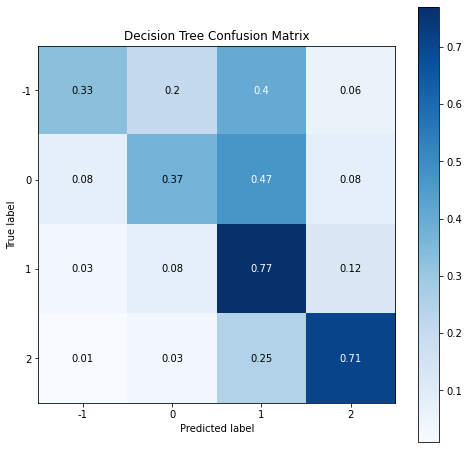

In [55]:
print('\nDecision Tree\n', classification_report(y_val, tree_prediction))
plot_confusion_matrix(y_val, tree_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

**Key Observations**

A Classification report is used to measure the quality of predictions from a classification algorithm.

+ Anti Climate Change 
+ Neutral 
+ Pro
+ News


The confusion matrix heatmap shows the recall score for each sentiment class.
**To be continued**

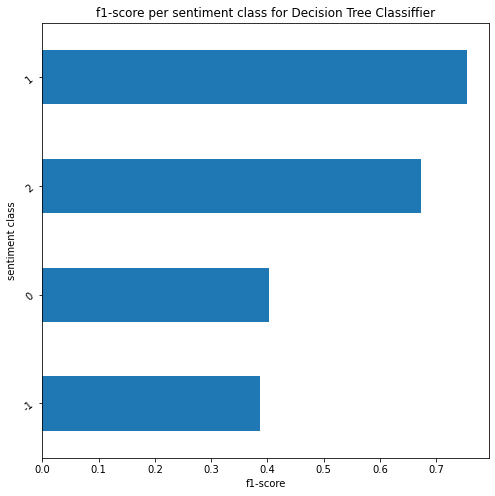

In [56]:
# # Visual represetation of of the f1 score for each class
report_tree = classification_report(y_val, tree_prediction, output_dict=True)
df_tree = pd.DataFrame(report_tree).transpose()
df_tree.drop(['accuracy'], inplace = True)
df_tree.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_tree.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('sentiment class')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Decision Tree Classiffier')
plt.show()

**Key Observations**
The above bar graph shows the f1 score for each sentiment class using the Decision Tree classifier
- We see that the decision tree model did a very good job at classifiying `Pro` sentiment class, followed by `News` and `Neutral` respectively.
- The Decision Tree classifier did a poor job at classifiying `Anti climate Change` tweets with an f1 score that is below 0.4.
- Poor classification of `Anti climate change` tweets is expected given the imbalance in our train data where we see that `Anti climate change` tweets only account for 8% of all tweets in the train dataset.

In [57]:
# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )



Overall accuracy score for Decision Tree : 0.6656

Weighted avg f1 score Decision Tree 0.6585


Overal the Decision Tree classifier did a poor job at classifying the sentiments, achieving the accuracy score of 0.6568 and a weighted F1 score of 0.6492

### Evalution of RandomForestClassifier

In [58]:
print('\nRandomForestClassifier\n', confusion_matrix(y_val, rfc_prediction))



RandomForestClassifier
 [[ 25  14  83   4]
 [  2  62 153   7]
 [  2  16 823  54]
 [  0   6  90 241]]



RandomForestClassifier
               precision    recall  f1-score   support

          -1       0.86      0.20      0.32       126
           0       0.63      0.28      0.39       224
           1       0.72      0.92      0.81       895
           2       0.79      0.72      0.75       337

    accuracy                           0.73      1582
   macro avg       0.75      0.53      0.57      1582
weighted avg       0.73      0.73      0.70      1582



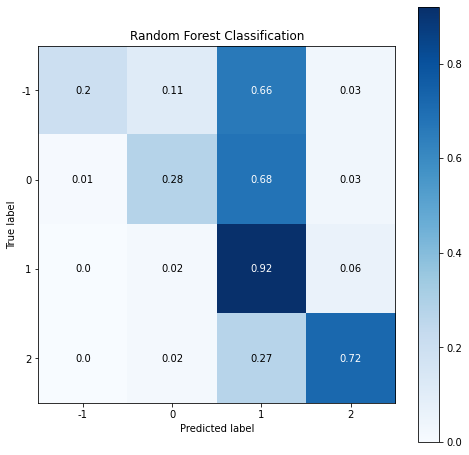

In [59]:
print('\nRandomForestClassifier\n', classification_report(y_val, rfc_prediction))
plot_confusion_matrix(y_val, rfc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Random Forest Classification')
plt.show()

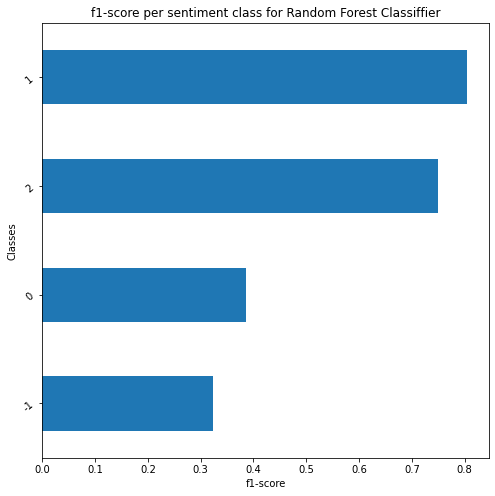

In [60]:
# # Visual represetation of of the f1 score for each class
report_rfc = classification_report(y_val, rfc_prediction, output_dict=True)
df_rfc = pd.DataFrame(report_rfc).transpose()
df_rfc.drop(['accuracy'], inplace = True)
df_rfc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_rfc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Random Forest Classiffier')
plt.show()

**Key Observations**
The above bar graph shows the f1 score for each sentiment class using the Random Forest classifier
- We see that the Random Forest model did a better job at classifiying `Pro` sentiment class  and  `News`  comapred to the Decision tree model, with both the `Pro` and `News` sentimetents with an f1 score of  0.80 and 76 respectively.  
- However even though the Random Forest classifier did a better job with `Pro` and `News` sentiment classes, the classifer perfomred poorly on `Neutral` and `Anti` sentiments with both sentiments having an f1 score below 0.4

In [61]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.7276

Weighted f1 score for RandomForestClassifier : 0.6955


The overall accuracy and weighted f1 score for the Random Forest Classifier is better compared to that of the Decision Tree classifier, making the Random Forest classifier the best model this far

### Evaluation of LinearSVClassifier

In [62]:
print('\nLinearSVC Model\n', confusion_matrix(y_val, Lsvc_prediction))


LinearSVC Model
 [[ 66  18  40   2]
 [ 10 117  87  10]
 [ 11  42 782  60]
 [  2   8  46 281]]



LinearSVC Model
               precision    recall  f1-score   support

          -1       0.74      0.52      0.61       126
           0       0.63      0.52      0.57       224
           1       0.82      0.87      0.85       895
           2       0.80      0.83      0.81       337

    accuracy                           0.79      1582
   macro avg       0.75      0.69      0.71      1582
weighted avg       0.78      0.79      0.78      1582



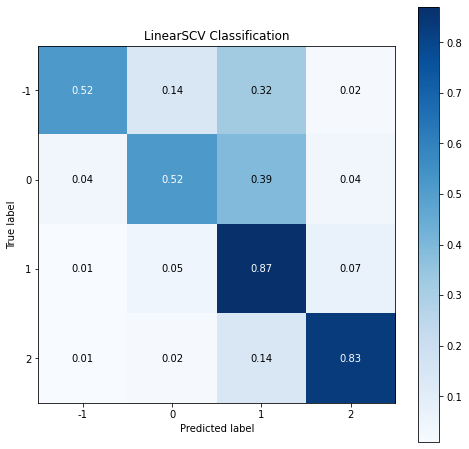

In [63]:
print('\nLinearSVC Model\n', classification_report(y_val, Lsvc_prediction))
plot_confusion_matrix(y_val, Lsvc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('LinearSCV Classification')
plt.show()

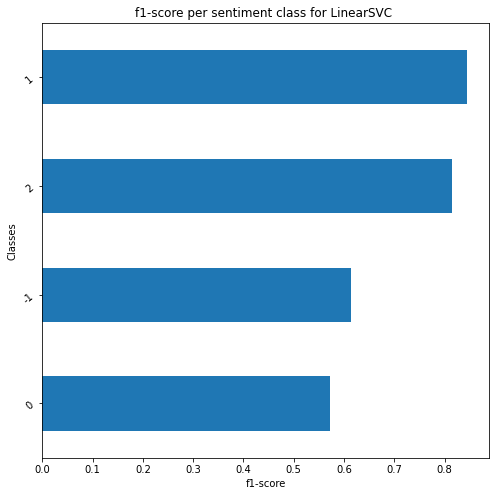

In [64]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, Lsvc_prediction, output_dict=True)
df_svc = pd.DataFrame(report_svc).transpose()
df_svc.drop(['accuracy'], inplace = True)
df_svc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_svc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for LinearSVC ')
plt.show()

**Key observations**

The above bar graph shows the f1 score for each sentiment class using the LinearSVC
- We see that the LinearSVC model did a far better job at classifiying `Pro` and `News` sentiment classes compared to `Decision Tree` and `RandomForest` models  with both classes achieving an f1 score of 0.85 and 0.81 respectively
- The LinearSVC model also did a far better job at classifying `Anti` sentiment class comapred to both the Decision tree and the Randrom Forest.
- There was a slight improvement in the classification of `neutral` tweets with the LinearSVC, which is by far overshadowed by the improvements we see in other sentiments classes
- The LinearSVC has done a better job overall in classifying the sentiments, we see that `Anti` and `Neutral` sentiments have almost the same score, same applies with `Pro` and `News` sentiments which is consistent with the distribution of the data between the sentiment classes

In [65]:
linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')


Overall accuracy score for LinearSVC Model : 0.7876

Weighted avg f1 score for LinearSVC Model : 0.7817


The LinearSVC  is the best we've seen this far achieving an accuracy score of 0.7876  and a weighted F1 score of 0.7817

### Evaluation of  Logistic Regression 

In [66]:
# Report the confusion matrix
print('\nLogistic Regression\n', confusion_matrix(y_val, logreg_prediction))


Logistic Regression
 [[ 65  17  41   3]
 [ 10 111  93  10]
 [ 11  38 786  60]
 [  1   5  53 278]]



Logistic Regression
               precision    recall  f1-score   support

          -1       0.75      0.52      0.61       126
           0       0.65      0.50      0.56       224
           1       0.81      0.88      0.84       895
           2       0.79      0.82      0.81       337

    accuracy                           0.78      1582
   macro avg       0.75      0.68      0.71      1582
weighted avg       0.78      0.78      0.78      1582



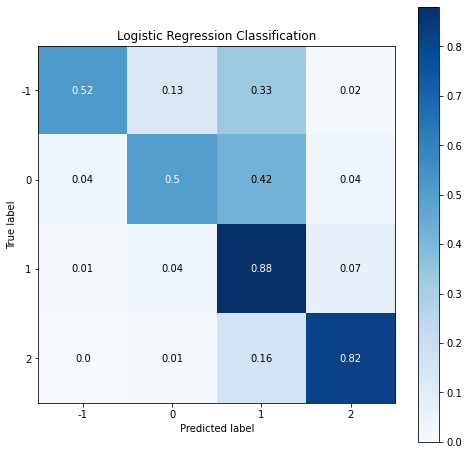

In [68]:
# Print a classification report

print('\nLogistic Regression\n', classification_report(y_val, logreg_prediction))
plot_confusion_matrix(y_val, logreg_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()



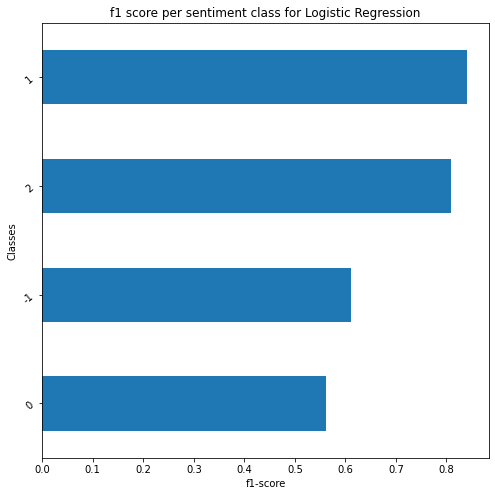

In [69]:
# # Visual represetation of of the f1 score for each class
report_logreg = classification_report(y_val, logreg_prediction, output_dict=True)
df_logreg = pd.DataFrame(report_logreg).transpose()
df_logreg.drop(['accuracy'], inplace = True)
df_logreg.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_logreg.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1 score per sentiment class for Logistic Regression')
plt.show()

**Key observations**
The above bar graph shows the f1 score for each sentiment class using Logistic Regression
- The Random Forest Classifier performed almost as good as the LinearSVC at classifying each sentiment class with `Pro` and `News` sentiment class achieving f1 scores of 84 and 81 respetively

In [70]:
# Print the overall accuracy
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)



Logistic Regression accuracy Score
 0.7838

Logistic Regression weighted f1 score
 0.7764


Overal the Logistic Regression classifier achieved the highest accuracy of 0.7838 and the highest wighted f1 score of 0.7764 which makes it the best model we've tried this far

### Evaluation of SGD Classifier

In [71]:
# Confusion matrix for the random forest classifier
print('\nSGD Classifier\n', confusion_matrix(y_val, SGD_prediction))


SGD Classifier
 [[ 68  18  36   4]
 [ 12 118  81  13]
 [ 11  45 762  77]
 [  2   9  43 283]]



SGD Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.73      0.54      0.62       126
           0       0.62      0.53      0.57       224
           1       0.83      0.85      0.84       895
           2       0.75      0.84      0.79       337

    accuracy                           0.78      1582
   macro avg       0.73      0.69      0.71      1582
weighted avg       0.77      0.78      0.77      1582



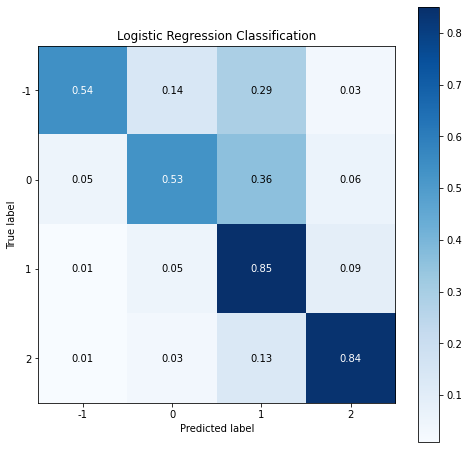

In [72]:
# The classification report 
print('\nSGD Classifier  Classification report :\n', classification_report(y_val, SGD_prediction))
plot_confusion_matrix(y_val, SGD_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()


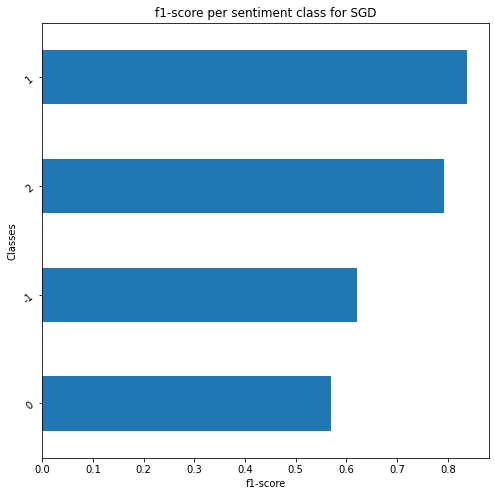

In [73]:
# # Visual represetation of of the f1 score for each class
report_sgd = classification_report(y_val, SGD_prediction, output_dict=True)
df_sgd = pd.DataFrame(report_sgd).transpose()
df_sgd.drop(['accuracy'], inplace = True)
df_sgd.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_sgd.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SGD')
plt.show()

**Key observations**

The above bar graph shows the f1 score for each sentiment class using 
Stochastic Gradient Descent classifier
- The SGD classifier is just as good at classifying `Pro` sentiment classs as the LinearSVC both achieving an f1 score of 0.84 however falls short in classifying the rest of the sentiment classes

In [ ]:
# Checking the accuracy score
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)

# Checking the f1_score report for the decison tree model
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)


SGD Classifier accuracy Score :
 0.7674

SGD weighted avg f1_score :
 0.7644


The overall accuracy score of the SGD classifier is 0.7826  and the wighted f1 score of 0.7763

### Support Vector Classfifier

In [ ]:
# Confusion matrix for the random forest classifier
print('\nSupport Vector Classifier\n', confusion_matrix(y_val, SVC_prediction))


Support Vector Classifier
 [[ 37  19  62   8]
 [  4  90 117  13]
 [  3  25 764 103]
 [  0   4  47 286]]



Support Vector Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.84      0.29      0.44       126
           0       0.65      0.40      0.50       224
           1       0.77      0.85      0.81       895
           2       0.70      0.85      0.77       337

    accuracy                           0.74      1582
   macro avg       0.74      0.60      0.63      1582
weighted avg       0.74      0.74      0.73      1582



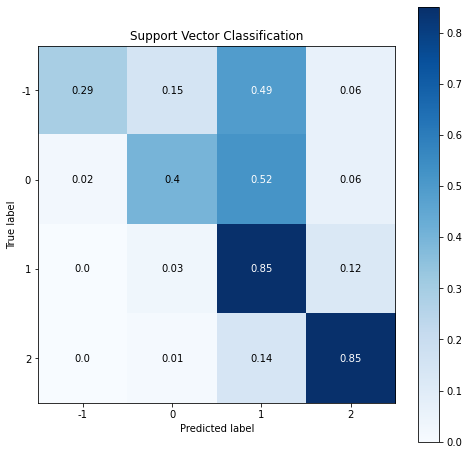

In [ ]:
# The classification report 
print('\nSupport Vector Classifier  Classification report :\n', classification_report(y_val, SVC_prediction))
plot_confusion_matrix(y_val, SVC_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Support Vector Classification')
plt.show()


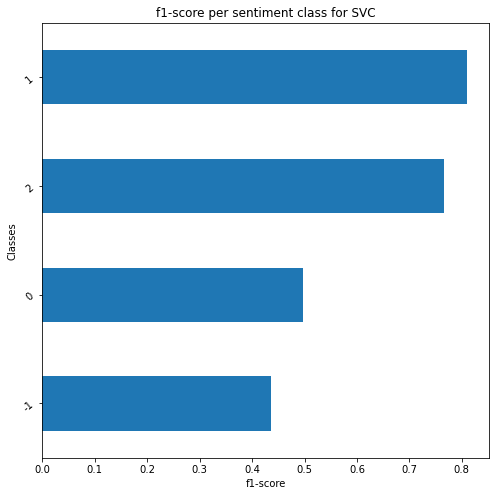

In [ ]:
# # Visual represetation of of the f1 score for each class
report_svc = classification_report(y_val, SVC_prediction, output_dict=True)
df_SVC = pd.DataFrame(report_svc).transpose()
df_SVC.drop(['accuracy'], inplace = True)
df_SVC.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_SVC.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for SVC')
plt.show()

**Key observations**

The above bar graph shows the f1 score for each sentiment class using the Support Vector Classifier(SVC)
- Much like the `LinearSVC` we see that the  the `SVC` does a really good job at classifying `Pro` sentiment class with a score of 0.81, followed by the `News` sentiment class with an f1 score of over 0.77.
- Unlike most of the models we've build this far, the Support Vector Classifier struggle more with classifying the `Anti`sentiment class

In [ ]:
# Checking the accuracy score
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score : {svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1 score : {svc_f1}')


Support Vector Classifier accuracy Score : 0.744

Support Vector Classifier weighted avg f1 score : 0.7268


The Support Vector Classifer achieves an accuracy score of 0.74 and the f1 score of 0.72 

<a id='compare'></a>
## Model Comparision

Model comparison by accuracy and macro f1_score

In [ ]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'Logistic Regression','Stochastic Gradient Descent',
                                    'Support Vector Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, sgd_acc, svc_f1],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, sgd_f1, svc_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

,Classifiers,Accuracy,Weighted avg f1 Score
0,Decision Tree,0.6650,0.6569
5,Support Vector Classifier,0.7268,0.7268
1,Random Forest,0.7332,0.7017
4,Stochastic Gradient Descent,0.7674,0.7644
3,Logistic Regression,0.7838,0.7764
2,LinearSVC,0.7876,0.7817


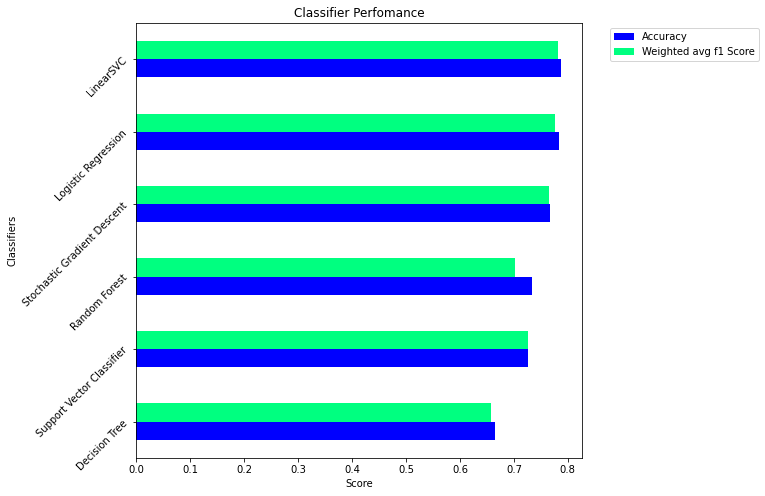

In [ ]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='winter')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

**Key observations**

From the above bar graph we see comparison of all the 6 models we've attempted thus far based on their `accuracy score` and associated `wighted f1 score`

- We see that our top 3 best performing models are `LinearSVC`,`Stochastic Gradient Descent` and `Logistic Regression` respectively, theres are the models will use in ensemble methods to try and improve our results
- The `Decision Tree` classifer is the worst  at classifying the tweets with the lowest accuracy and wighted f1 scores of 0.68 and 0.61 respectivey

**LinearSVC is the best performing model out of all 6 models that we've tried thus far with an accuracy score of 0.7876 and a weighted f1 score of 0.7871**

<a id='ensemble'></a>
# Ensemble Methods

Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance. In general, ensembles consist of multiple **heterogeneous or homogeneous** models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (e.g. by taking the mean) to produce the final output.

<a id='ensemble'></a>
## Heterogeneous Ensembel Method
This type of ensemble consists of different types of models, so it can add pretty much any classification model we want, however in our case we're only going to add our top 3 best perfoming models which are, `LinearSVC, Stochastic Gradient Descent, Logistic Regression, `.

The Heterogeneous ensemble method we're going to look at is the `Voting classifier`


### Voting classifer 
Voting involves combining individual model outputs through a kind of "[majority rule](https://en.wikipedia.org/wiki/Majority_rule)" paradigm.
The diagram below shows how the `Voting Classifier` works
![ud382N9.png](https://iq.opengenus.org/content/images/2020/01/ud382N9.png)

In [ ]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("LinearSVC",Lsvc_count),("SGD",SGD_count),("Logistric Regression",logreg_count)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])

# building the voting classifier
Voting_classifier = VotingClassifier(estimators=models,weights=model_weightings)


In [ ]:
# training the voting classifier
Voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('LinearSVC',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('svc', LinearSVC())])),
                             ('SGD',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('SGD', SGDClassifier())])),
                             ('Logistric Regression',
                              Pipeline(steps=[('CountVec',
                                               CountV

In [ ]:
voting_prediction = Voting_classifier.predict(X_val) # Voting Classifier predictions

In [ ]:
print('\nVoting Classifier  Classification report :\n', classification_report(y_val, voting_prediction))


Voting Classifier  Classification report :
               precision    recall  f1-score   support

          -1       0.75      0.52      0.61       126
           0       0.65      0.50      0.56       224
           1       0.81      0.88      0.84       895
           2       0.79      0.82      0.81       337

    accuracy                           0.78      1582
   macro avg       0.75      0.68      0.71      1582
weighted avg       0.78      0.78      0.78      1582



The voting  classifer did a good job at classifying the sentiment classes which 'Neutral' sentiment class being the poorly classified one
- achieving the f1 score of
- `Pro` sentiment class : 0.84
- `News` sentiment class : 0.81
- `Anti` sentiment class: 0.61
- `Neutral` sentiment class : 0.56

In [ ]:
# Checking the accuracy score
voting_acc = round(accuracy_score(y_val, voting_prediction),4)
print(f'\nOverall accuracy for the Voting Classifier : {voting_acc}')
voting_f1 = round(f1_score(y_val, voting_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for the Voting Classifier : {voting_f1}')


Overall accuracy for the Voting Classifier : 0.7838

Weighted avg f1 score for the Voting Classifier : 0.7764


The Voting Classifier achieved the accuracy and weighted f1 score of 0.7838 and 0.7764 respectively, which is not much of an improvement from our best performing model that achieved the accuracy of 0.7876 and 0.7817

<a id='tunning'></a>
# Hyperparameter Tunning
We will look at two methods of hyperparameter tunning, namely `GridSearchCV` and `Parfit`

* Models we will perform hyperparameter tunning on
  * LinearSVC
  * Logistic Regression
  * Support Vector Classifier
 

The caveat of using pipelines to build our models is that we can't easily get the parameters for our models as such to perfom hyperparameter tunning and obtain the best parameters for our models we wont be using the pipelines, this means we will convert raw text data to numeric data independently from building the models.

In [ ]:
# We have to to prepare our data again since we wont be using the pipelines

train = train_data.copy()
test = test_data.copy()

train['message'] = replace_sentiments(train)
test['message'] = replace_sentiments(test)
train['clean_tweets'] = clean_tweets(train)
test['clean_tweets'] = clean_tweets(test)

normalizer = WordNetLemmatizer()
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test['clean_tweets'] = test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])



X = train['clean_tweets']
y = train['sentiment']
X_test = test['clean_tweets']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

In [ ]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

## Tuning LinearSVC

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


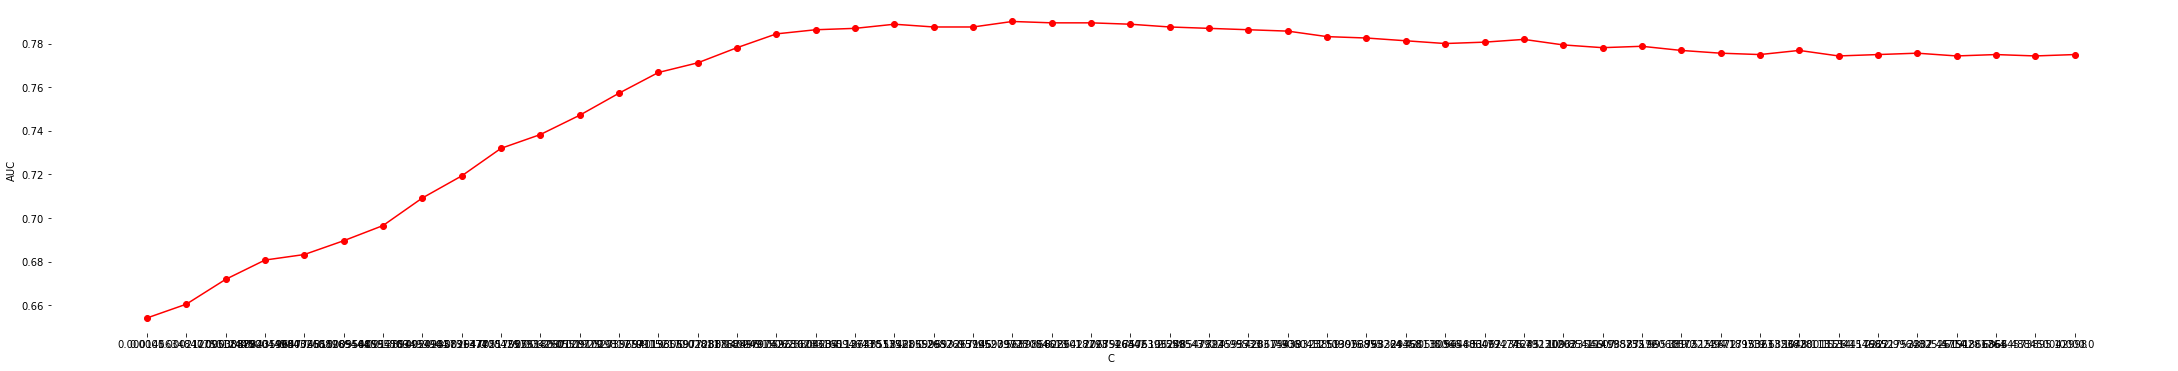

LinearSVC(C=0.3906939937054613) 
 0.7901390644753477


In [ ]:
# Tunning LinearSVC using parfit

grid = {'C': np.logspace(-4, 4, 50)}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")
print(bestModel, '\n',bestScore)

The AUC plot shows the accuracy score for each value fo the C parameter that the model is fitted with

The `parfit` method peformed 50 fits and with the hyperparameter C = 0.3906939937054613, achieved the accuracy score of 0.79 which is an improvement of 0.0025

Now we want to see how the GridSearch method tunes the `LinearSVC` with the same param grid we used for the `partfit` method

In [ ]:
# Tuning LinearSVC using GridSearchCV

# The hyperprarameter gridsearch for the LinearSVC is purposefully commented out because 
# it perfoms 5 folds for each of the 9 candidates totalling in 45 fits, this GridSearch code took  2 hours to complete

#  we have saved the resulting model as a pickle file for convinience


'''
param_grid = {'C': np.logspace(-4, 4, 50)}
# grid_lsvc = GridSearchCV(LinearSVC(),param_grid,refit=True,verbose=2)
# grid_lsvc.fit(X_train_new,y_train)

grid_lsvc = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)  

grid_lsvc.fit(X_train_new,y_train)'''


# # Saving the model
# import pickle
# model_save_path = 'LinearSVC.pkl'
# with open(model_save_path, 'wb') as file:
#     pickle.dump(grid_lsvc, file)
    
 
#  # loading the saved Logistic Regression model
# model_load_path = 'LinearSVC.pkl'
# with open(model_load_path, 'rb') as file:
#     grid_lsvc=pickle.load(file)

# The GridSearch Best parameter
best_param = {'C': 7.9060432109076855}

# retrain the model
grid_lsvc = LinearSVC(C= 7.9060432109076855)
grid_lsvc.fit(X_train, y_train)

LinearSVC(C=7.9060432109076855)

In [ ]:
tuned_lsvc_predictions = grid_lsvc.predict(X_val)

In [ ]:
# Checking the accuracy score
tuned_lsvc_acc = round(accuracy_score(y_val, tuned_lsvc_predictions),4)
print(f'\nOverall accuracy score for LinearSVC : {tuned_lsvc_acc}')


Overall accuracy score for LinearSVC : 0.7832


The resulting best accuracy score for the GridSearch method is 0.78 which is significatly low compared to the one we got using the parfit method

In [ ]:
# We now retrain the LinearSVC with the best parameters we got from the tuning method that performed the best

final_lsvc = LinearSVC(C=0.3906939937054613, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.0001, verbose=0) 
final_lsvc.fit(X_train, y_train)
LinearSVC_prediction = final_lsvc.predict(X_val)
final_svc_acc = accuracy_score(y_val, LinearSVC_prediction)
print(f'\nOverall accuracy score for LinearSVC : {final_svc_acc}')


'''
# Saving the model
import pickle
model_save_path = 'linear_svc.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(final_lsvc, file)
    
  
 # loading the saved Logistic Regression model
model_load_path = 'linear_svc.pkl'
with open(model_load_path, 'rb') as file:
    Logistic_reg_tuned=pickle.load(file)
 
'''


Overall accuracy score for LinearSVC : 0.7901390644753477


"\n# Saving the model\nimport pickle\nmodel_save_path = 'linear_svc.pkl'\nwith open(model_save_path, 'wb') as file:\n    pickle.dump(final_lsvc, file)\n    \n  \n # loading the saved Logistic Regression model\nmodel_load_path = 'linear_svc.pkl'\nwith open(model_load_path, 'rb') as file:\n    Logistic_reg_tuned=pickle.load(file)\n \n"

In [ ]:
# Saving the model
import pickle
model_save_path = 'final_lsvc.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(final_lsvc, file)

In [ ]:
Final_lsvc_acc = accuracy_score(y_val, LinearSVC_prediction)
Final_lsvc_f1 = f1_score(y_val, LinearSVC_prediction, average = 'weighted')

## Tuning Logistic Regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


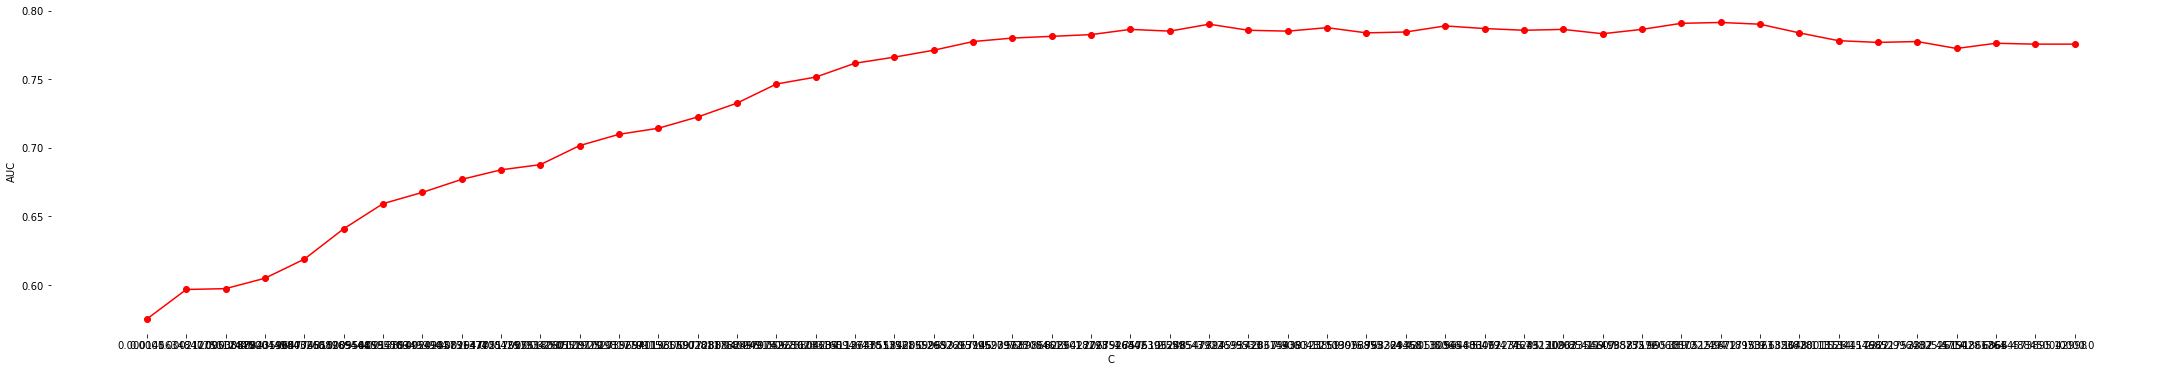

LogisticRegression(C=339.3221771895323) 

 0.7914032869785083


In [ ]:
# Tunning Logistic Regression using parfit

grid = [
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 50),
    'solver' : ['lbfgs']},]

paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")
print(bestModel, '\n\n',bestScore)

The AUC plot shows the accuracy score for each value fo the C parameter that the model is fitted with

The `parfit` method peformed 50 fits and with the hyperparameter C=C=339.3221771895323, achieved the accuracy score of 0.7914 which is a slight improvement from the accuracy score we had for the Logistic Regression

Now we want to see how the GridSearch method tunes the `Logistic Regression` with the same param grid we used for the `partfit` method

In [ ]:
# Tuning Logistic Regression using GridSearchCV

# The hyperprarameter gridsearch for the logistic regression model is purposefully commented out because 
# it perfoms 5 folds for each of the 50 candidates totalling in 250 fits, this GridSearch  code took 15 minutes to complete
#  we have saved the resulting model as a pickle file

'''
param_grid = [
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 50),
    'solver' : ['lbfgs']},]

Logistic_reg_grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=2)
Logistic_reg_grid.fit(X_train_new, y_train)


# Saving the model
import pickle
model_save_path = 'LogisticReg.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(logistic_grid, file)
    
  
 # loading the saved Logistic Regression model
model_load_path = 'LogisticReg.pkl'
with open(model_load_path, 'rb') as file:
    Logistic_reg_tuned=pickle.load(file)
    

best_params = {'C': 3.727593720314938, 'penalty': 'l2', 'solver': 'lbfgs'}
    
'''


# Retraining the Logistic Regresion model with best parameters                     
grid_Log_reg = LogisticRegression(C = 3.727593720314938, penalty = 'l2',solver='lbfgs', random_state=42)
grid_Log_reg.fit(X_train, y_train)

tunned_logreg_acc = round(accuracy_score(y_val, grid_Log_reg.predict(X_val)),4)
print(f'The accuracy score score for tuned Logistic Regression Classifier : {tunned_logreg_acc}')

The accuracy score score for tuned Logistic Regression Classifier : 0.7857


The GridSearch method achieved the best accuracy score of 0.7857 which is slightly less comapared to the accuracy score from the parfit method

In [ ]:
# Saving the model
import pickle
model_save_path = 'Logistic_regression.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(grid_Log_reg, file)

In [ ]:
# We now retrain Logistic Regression with the best parameters we got from the tuning method that performed the best

final_logreg = LogisticRegression(C = 3.727593720314938, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
final_logreg.fit(X_train, y_train)
final_log_reg_prediction= final_logreg.predict(X_val) 
final_logreg_acc = round(accuracy_score(y_val, final_log_reg_prediction),4)
final_logreg_acc

0.7857

In [ ]:
final_logreg_f1 = round(f1_score(y_val, final_log_reg_prediction, average = 'weighted'),4)
final_logreg_f1

0.7789

## Tuning Support Vector Classifier

In [ ]:
# Tunning Support Vector Classifier using GridSearchCV

# This code is purposefully commnted out because it Fits 5 folds for each of 48 candidates, totalling 240 fits
# the total runtime for this gridserch was 144 Minutes
# we have saved the model in a pickle file

'''
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(accuracy_score(y_val, grid.predict(X_val)))

best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
'''

# retraining the support vector classifier with the best params
svclf = SVC(C=10, gamma=0.01, kernel='rbf',random_state=42)
svclf.fit(X_train, y_train)
TunedSVC_prediction= svclf.predict(X_val)





In [ ]:
# Saving the model
import pickle
model_save_path = 'SVC_model.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(svclf, file)
  

In [ ]:
# Checking the accuracy score
TunedSVC_prediction = svclf.predict(X_val)

tunned_svc_acc = round(accuracy_score(y_val, TunedSVC_prediction),4)
print(f'\nOverall accuracy score for Tuned Support Vector Classifier accuracy Score : {tunned_svc_acc}')
tunned_svc_f1 = round(f1_score(y_val, TunedSVC_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for Tuned Support Vector Classifier : {tunned_svc_f1}')


Overall accuracy score for Tuned Support Vector Classifier accuracy Score : 0.7731

Weighted avg f1 score for Tuned Support Vector Classifier : 0.767


In [ ]:
print(classification_report(y_val, TunedSVC_prediction))

              precision    recall  f1-score   support

          -1       0.76      0.45      0.57       126
           0       0.60      0.53      0.56       224
           1       0.82      0.85      0.84       895
           2       0.75      0.85      0.80       337

    accuracy                           0.77      1582
   macro avg       0.73      0.67      0.69      1582
weighted avg       0.77      0.77      0.77      1582



In [ ]:
Final_svc_acc = accuracy_score(y_val, TunedSVC_prediction)
Final_svc_f1 = f1_score(y_val, TunedSVC_prediction, average = 'weighted')

<a id='final'></a>
# Final model selection

Comparing all the models we've build so far to choose the best performing one

In [ ]:
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC'
                                    ,'Logistic Regression','Stochastic Gradient Descent',
                                    'Support Vector Classifier', 'Voting Classifer',
                                    'Tunned_LinearSVC','Tunned LogisticReg','Tunned_SVC'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, sgd_acc, svc_f1, voting_acc
                                ,Final_lsvc_acc ,final_logreg_acc,
                                Final_svc_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, sgd_f1, svc_f1,
                                              voting_f1, Final_lsvc_f1 ,final_logreg_f1, 
                                              Final_svc_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

,Classifiers,Accuracy,Weighted avg f1 Score
0,Decision Tree,0.665000,0.656900
5,Support Vector Classifier,0.726800,0.726800
1,Random Forest,0.733200,0.701700
4,Stochastic Gradient Descent,0.767400,0.764400
9,Tunned_SVC,0.773072,0.767030
3,Logistic Regression,0.783800,0.776400
6,Voting Classifer,0.783800,0.776400
8,Tunned LogisticReg,0.785700,0.778900
2,LinearSVC,0.787600,0.781700
7,Tunned_LinearSVC,0.790139,0.784131


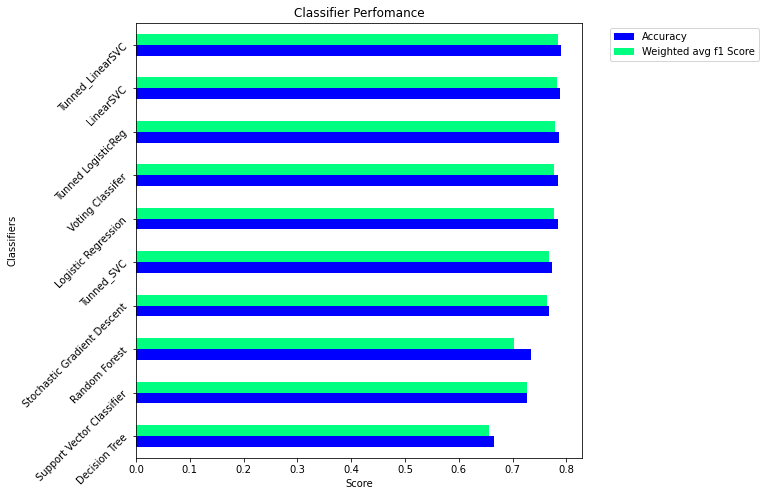

In [ ]:
df.set_index(df['Classifiers'], inplace = True)
df.drop(['Classifiers'],axis = 1)
df.plot(kind='barh', figsize = (8,8),colormap='winter')
plt.xlabel('Score')
plt.yticks(rotation = 45)
plt.title('Classifier Perfomance')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

We have build a total of 11 models in this notebook out of all the models we've build, We see that the best performing model is the tunned LinearSVCwith the best accuracy score of 0.79 and the best weighted f1 score  of 78.

We will be using the **Support Vector Classifer** to make the final prediction.

## Final evaluation of our best model

In [ ]:
print('classfication report for our best model\n',classification_report(y_val, final_lsvc.predict(X_val)))

classfication report for our best model
               precision    recall  f1-score   support

          -1       0.75      0.53      0.62       126
           0       0.65      0.53      0.58       224
           1       0.82      0.88      0.85       895
           2       0.79      0.83      0.81       337

    accuracy                           0.79      1582
   macro avg       0.75      0.69      0.72      1582
weighted avg       0.78      0.79      0.78      1582



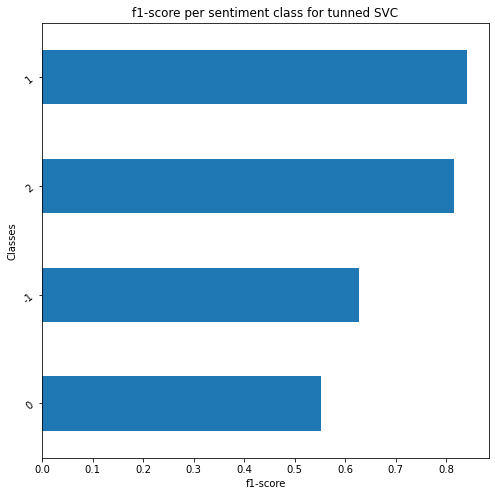

In [ ]:
# # Visual represetation of of the f1 score for each class
report_tuned_lsvc = classification_report(y_val, tuned_lsvc_predictions, output_dict=True)
df_tuned_lsvc = pd.DataFrame(report_tuned_lsvc).transpose()
df_tuned_lsvc.drop(['accuracy'], inplace = True)
df_tuned_lsvc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_tuned_lsvc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for tunned SVC')
plt.show()

The above bar graph shows the f1 score for each sentiment class our best model
- The Support Vector Classifier is by far our best performing model, achieving f1 score of 0.78 for `Pro climate change` sentiment class, followed by `News` and `Anti` Climate sentiment classes with f1 scores of 0.85 and 0.81 respectively, which is quite impressive given that all our models perfomed poorly when it comes to classifying `anti climate change` sentiment class


## ROC Curves and AUC

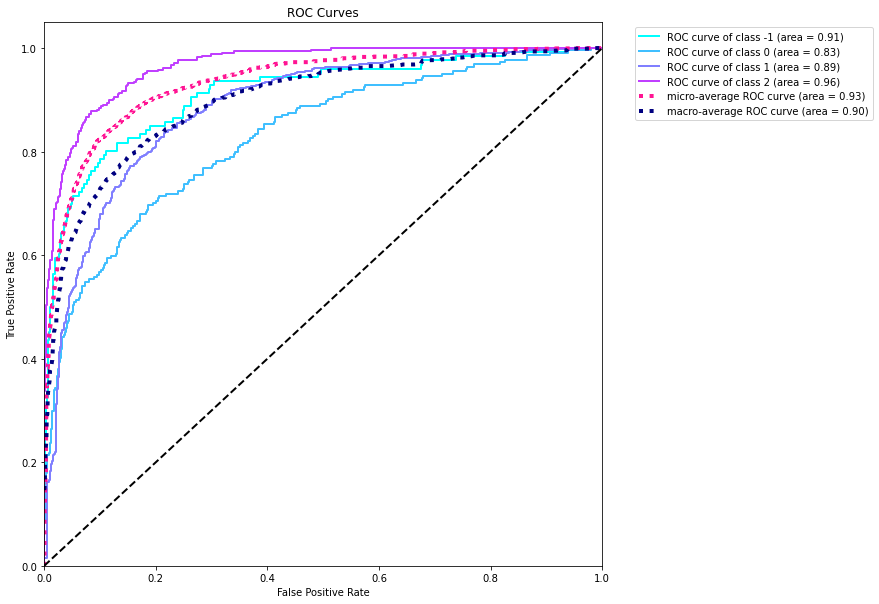

In [ ]:
OneVsRest =  OneVsRestClassifier(LinearSVC(C=0.3906939937054613,
                                           class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.0001, verbose=0))
y_train_binarized = label_binarize(y_train, classes=[-1, 0, 1, 2])
y_val_binarized = label_binarize(y_val, classes=[-1, 0, 1, 2])
OneVsRest.fit(X_train, y_train_binarized)
y_prob = OneVsRest.decision_function(X_val)
plot_roc(y_val, y_prob,figsize=(10,10),cmap='cool')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

<a id='predictions'></a>
# Final prediction

In [ ]:
y_pred = final_lsvc.predict(X_test)

In [ ]:
y_pred

array([2, 0, 1, ..., 0, 0, 1])

In [ ]:
test['sentiment'] = y_pred

In [ ]:
test[['tweetid','sentiment']].to_csv('Final Linear Support.csv', index=False)

In [ ]:
test[['tweetid','sentiment']]

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


# Closing the comet experiment

In [ ]:
# close the experiment
#experiment.end()

In [ ]:
#experiment.display()

<a id='conclusion'></a>
# Conclusion

In this notebook we have succesfully build 10 machine learning models to classify whether not a person believes in man made climate change based on their novel tweet data, Even though our models struggled with classifying the `anti` man made climate change sentiment class they did a very good job as classifying the `pro` man made climate change sentiment class. Our best model is the LinearSVC achieving an accuracy score and the weighted f1 score of 0.79 and 0.78 respectively based on the validation dataset.

The LinearSVC model achieved an F1 score of 0.75936 on unseen/test data.


<a id='appendix'></a>
# Appendix

* Things we did but couldnt fit anywhere in the notebook

<a id='references'></a>
# References

What is climate change : https://climatekids.nasa.gov/climate-change-meaning/

TF-IDF Explained And Python Sklearn Implementation :
https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275

Decision Trees Explained Easily :
https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248

Understanding Random Forests Classifiers in Python :
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

What is LightGBM, How to implement it? How to fine tune the parameters?
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

Using word2vec embeddings as featrues :
https://www.kaggle.com/vladislavkisin/word2vec-in-supervised-nlp-tasks-shortcut

A hands-on intuitive approach to Deep Learning Methods for Text Data — Word2Vec, GloVe and FastText
https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa

How to make SGD Classifier perform as well as Logistic Regression
https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

Big data and what it means: https://www.uschamberfoundation.org/bhq/big-data-and-what-it-means

CO2 and the climate curve : https://medialibrary.climatecentral.org/resources/co2-and-the-climate-curve

Effects of Climate change : https://climate.nasa.gov/effects/

Past a point of no return': Reducing greenhouse gas emissions to zero still won't stop global warming, study says: https://www.usatoday.com/story/news/nation/2020/11/12/reducing-greenhouse-gas-emissions-stop-climate-change-study/3761882001/

[Back to top ↑](#Top)